In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
class Cliff:
    action_table = {0: np.array([0, 1]), 1: np.array([1, 0]), 2: np.array([0, -1]), 3: np.array([-1, 0])}

    def __init__(self):
        self.pos = (3, 0)
    
    def reset(self):
        self.pos = (3, 0)
        return self.pos
    
    def step(self, action):
        new_pos = self.pos + self.action_table[action]
        new_pos = np.clip(new_pos, [0, 0], [3, 11])

        reward = -1
        done = False

        if new_pos[0] == 3 and 1 <= new_pos[1] <= 10:
            reward = -100
            new_pos = np.array([3, 0])
        
        if (new_pos == [3, 11]).all():
            done = True

        self.pos = tuple(new_pos)

        return self.pos, reward, done

In [14]:
epsilon = 0.1
alpha = 0.4
gamma = 1

episodes = 500
trials = 50

In [15]:
def select_action(Q, state):
    if np.random.rand() < epsilon:
        return np.random.randint(4)
    else:
        return np.argmax(Q[state])

In [16]:
total_rewards_SARSAs = []
for trial in range(trials):
    total_rewards_SARSA = []
    Q_SARSA = np.zeros((4, 12, 4))

    for episode in range(episodes):
        cliff = Cliff()
        state = cliff.reset()
        action = select_action(Q_SARSA, state)
        done = False

        total_reward = 0
        while not done:
            next_state, reward, done = cliff.step(action)
            total_reward += reward
            
            next_action = select_action(Q_SARSA, next_state)
            Q_SARSA[state][action] += alpha * (reward + gamma * Q_SARSA[next_state][next_action] - Q_SARSA[state][action])

            state = next_state
            action = next_action

        total_rewards_SARSA.append(total_reward)

    total_rewards_SARSAs.append(total_rewards_SARSA)

In [17]:
total_rewards_QLearnings = []
for trial in range(trials):
    total_rewards_QLearning = []
    Q_QLearning = np.zeros((4, 12, 4))

    for episode in range(episodes):
        cliff = Cliff()
        state = cliff.reset()
        done = False

        total_reward = 0
        while not done:
            action = select_action(Q_QLearning, state)
            
            next_state, reward, done = cliff.step(action)
            total_reward += reward

            Q_QLearning[state][action] += alpha * (reward + gamma * np.max(Q_QLearning[next_state]) - Q_QLearning[state][action])

            state = next_state

        total_rewards_QLearning.append(total_reward)

    total_rewards_QLearnings.append(total_rewards_QLearning)

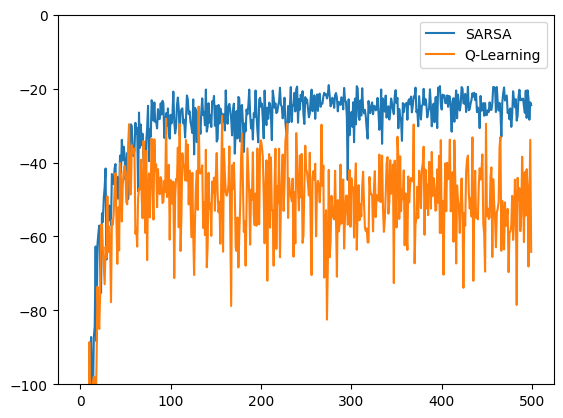

In [18]:
plt.plot(np.mean(total_rewards_SARSAs, axis=0), label='SARSA')
plt.plot(np.mean(total_rewards_QLearnings, axis=0), label='Q-Learning')
plt.ylim(-100, 0)
plt.legend()
plt.show()

In [19]:
states_SARSA = []

cliff = Cliff()
state = cliff.reset()
states_SARSA.append(state)
action = np.argmax(Q_SARSA[state])
done = False

while not done:
    next_state, reward, done = cliff.step(action)
    
    next_action = np.argmax(Q_SARSA[state])

    state = next_state
    action = next_action

    states_SARSA.append(state)

In [20]:
states_QLearing = []

cliff = Cliff()
state = cliff.reset()
states_QLearing.append(state)
done = False

while not done:
    action = np.argmax(Q_QLearning[state])
    next_state, reward, done = cliff.step(action)

    state = next_state
    states_QLearing.append(state)

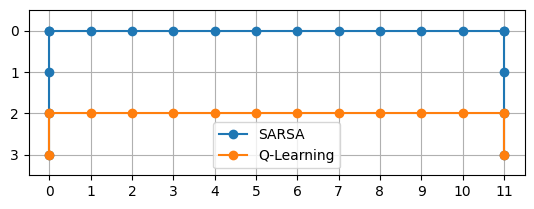

In [21]:
states_SARSA = np.array(states_SARSA)
states_QLearing = np.array(states_QLearing)

plt.plot(states_SARSA[:, 1], states_SARSA[:, 0], 'o-', label='SARSA')
plt.plot(states_QLearing[:, 1], states_QLearing[:, 0], 'o-', label='Q-Learning')
plt.legend()
plt.gca().set_aspect('equal')
plt.xticks(range(12))
plt.xlim(-0.5, 11.5)
plt.ylim(3.5, -0.5)
plt.grid()
plt.show()